In [137]:
import networkx as nx
import pandas as pd
from fa2 import ForceAtlas2
#from util import DATA_PATH
import ast
import matplotlib.pyplot as plt
import ast
from matplotlib.animation import FuncAnimation
import numpy as np
from datetime import datetime
import ast
import seaborn as sns
import itertools
from collections import Counter

In [138]:
def node_degree_to_size(degree):
        return degree

In [139]:
df = pd.read_csv("data/attributes_album_artist_date_table_v2.csv")
df_matches = pd.read_csv("data/updated_artist_matches.csv")
df["Artist references"] = df_matches["Artist references"].apply(ast.literal_eval)

#1. Convert date to datetime format
df['Year']  = df['Year'].apply(str)


#convert month text to ordinal number
d_month = {'JANUARY': 1,
           'FEBRUARY': 2, 
           'MARCH': 3, 
           'APRIL':4,
           'MAY':5, 
           'JUNE':6, 
           'JULY':7,
           'AUGUST':8,
           'SEPTEMBER':9,
           'OCTOBER':10,
           'NOVEMBER':11,
           'DECEMBER':12}

df['month updated']=[d_month.get(x) for x in df['Date']]
df['month updated'] = df['month updated'].astype(float)
df['month updated']= df['month updated'].fillna(1)
df['month updated'] = df['month updated'].astype(int)
df['month updated']=[d_month.get(x) for x in df['Date']]
df['month updated'] = df['month updated'].astype(float)
df['month updated']= df['month updated'].fillna(1)
df['month updated'] = df['month updated'].astype(int)


df['Date.1']= df['Date.1'].astype(str)
df['Date.1'] = df['Date.1'].replace('?', 1)
df["Date2"] = df['Year'].apply(str)+'-'+df['month updated'].apply(str)+'-'+df['Date.1'].apply(str)
#convert to datetime format
df["Release Date"] = [datetime.strptime(x, '%Y-%m-%d') for x in df["Date2"]]
#df.drop(["Date", "Date2", "Release_Data", "Release_Date"], axis=1)

#sort by values
df = df.sort_values(by=["Release Date"])


In [141]:
#reorder columns
df = df.drop(["Unnamed: 0", 'Unnamed: 0.1', 'Notes', 'month updated', 'Date2'], axis=1)
df.columns =['Year', 'Month', 'Day', 'Album', 'Artist', 
       'Album link', 'Artist link', 'Artist Years Active', 'Artist Labels', 'Artist Genre',
       'Collaborators', 'Album Release Date']
cols = df.columns.tolist()
cols =  ['Year', 'Month', 'Day', 'Album', 
        'Artist','Album link', 'Artist link',  'Artist Labels', 
         'Artist Genre', 'Collaborators',  'Artist Years Active', 'Album Release Date']
df = df[cols]  

df.columns = ['Year', 'Month', 'Day', 'Album', 
        'Artist','Album link', 'Artist link', 'Artist Years Active', 'Artist Labels', 
         'Artist Genre', 'Album Collaborators',   'Album Release Date']

In [144]:
#create collab pairs
df["Artist_Duplicated"]=[[df["Artist"][i]]*len(list(df["Album Collaborators"][i])) for i in range(0, 5262)]
df["Pairs"]=[set([x for x in itertools.product(df["Artist_Duplicated"][i], df["Album Collaborators"][i]) if x[0]!=x[1]]) for i in range(len(df))]
df = df.drop(["Artist_Duplicated"], axis=1)
df.columns = ['Year', 'Month', 'Day', 'Album', 
        'Artist','Album link', 'Artist link', 'Artist Years Active', 'Artist Labels', 
         'Artist Genre', 'Album Collaborators',   'Album Release Date', "Collab Pairs"]


In [85]:
#CODE ARTUR - didn't use it

# def is_necessary(row) -> True:
#     #if row["Artist"] == "Various Artists": return False
#     #if "remix" in str(row["Notes"]).lower(): return False
#     #if "compilation" in str(row["Notes"]).lower(): return False
#     return True

# df = df[~df.apply(is_necessary, axis=1)].reset_index()


In [147]:
#create new column
df["Number of Collaborators Updated"] = [0]*len(df) 
#iterate through collab pairs
for pair in df["Collab Pairs"]:
    for p in pair:
        artist1= p[0] 
        #print(artist1)
        artist2= p[1] 
        #print(artist2)
        if (artist1 in df["Artist"] and artist2 in df["Artist"]):
            print("both artists")
        #check if the two artists have an album in common       
        if set(df[df["Artist"]==artist1]["Album"]) & set(df[df["Artist"]==artist2]["Album"]):
            #get the album(s) index
            album = list(set(df[df["Artist"]==artist1]["Album"]) & set(df[df["Artist"]==artist2]["Album"]))
            index_album= [df[df["Album"]==x].index for x in list(set(album))]
            #for each album 2 artists have in common, increment the number of collabs by 1
            for i in range(len(index_album)):
                df["Number of Collaborators Updated"].iloc[index_album[i]] +=1

/Users/dariazahaleanu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [149]:
#count Number of Collaborators
df2 = df.groupby(by=["Artist"])["Number of Collaborators Updated"].sum()

Counter(df2)

Counter({0: 2341, 2: 17, 1: 13})

In [150]:
df.head(5)

,Year,Month,Day,Album,Artist,Album link,Artist link,Artist Years Active,Artist Labels,Artist Genre,Album Collaborators,Album Release Date,Collab Pairs,Number of Collaborators Updated
13,1990,JANUARY,1,The Best of Van Morrison,Van Morrison,The_Best_of_Van_Morrison,Van_Morrison,1958-2021,"[['Decca', 'Bang', 'Warner', 'Bros.']]","[['Rock', 'R&B']]","[Robbie Robertson, Van Morrison]",1990-01-01,"{(The Sundays, N.W.A)}",0
14,1990,JANUARY,1,Colour,The Christians,Colour_(The_Christians_album),The_Christians_(band),NaN,NaN,NaN,[],1990-01-01,"{(Joan Jett, John Flansburgh), (Joan Jett, Ala...",0
0,1990,JANUARY,8,Scumdogs of the Universe,GWAR,Scumdogs_of_the_Universe,GWAR,1984-2021,"[['Shimmy', 'Disc', 'Master', 'Metal']]","[['Thrash', 'metal']]",[N.W.A],1990-01-08,"{(Toad the Wet Sprocket, The Sundays)}",0
1,1990,JANUARY,15,Flood,They Might Be Giants,Flood_(They_Might_Be_Giants_album),They_Might_Be_Giants,1982-2021,"[['BarNone', 'Barsuk', 'Restless', 'Elektra']]","[['Alternative', 'rock']]","[Alan Winstanley, Clive Langer, Frank Zappa, J...",1990-01-15,"{(Ricky Van Shelton, Mick Jagger), (Ricky Van ...",0
2,1990,JANUARY,15,"Reading, Writing and Arithmetic",The Sundays,"Reading,_Writing_and_Arithmetic",The_Sundays,1988-1997,"[['Rough', 'TradeGeffenParlophone']]","[['Alternative rock', ' dream pop', ' jangle p...",[The Sundays],1990-01-15,{},0


In [170]:
# df.to_csv("data/df_collabs_Nov17.csv")

## Build Network

In [152]:
#1. Make G into a Directed Graph
G = nx.DiGraph()
#add nodes and node attributes 
G.add_nodes_from(df["Artist"], years_active=df["Artist Years Active"], label=df["Artist Labels"], genre=df["Artist Genre"])

for _, row in df.iterrows():
    if row["Artist"] == "Various Artists":
        continue
    collab = row["Album Collaborators"]
    artist = row["Artist"]
    album = row["Album"]
    album_date = row["Album Release Date"]
    edges = [(artist, col) for col in collab if col != artist and col != "Various Artists"]
    #add edge attributes
    #WEIGHTS - aggregate by sorted pair of artists and remove duplicates and count collabs
    weight = row["Number of Collaborators Updated"]
    #add edge attributes - album date and weights
    #EDGE ATTRIBUTE - list albums
    G.add_edges_from(edges, album_date=album_date, album=album, weight=weight)

    
nx.write_gpickle(G, "G.pickle")


## Basic Stats: Number of Nodes, Edges etc

In [153]:
print(f'num nodes: {len(list(G.nodes))}')
print(f'num edges: {G.number_of_edges()}')

num nodes: 2763
num edges: 15108


In [157]:
#Remove isolated nodes from the network
G.remove_nodes_from(list(nx.isolates(G)))
# Extract the largest component LC
LC = max(nx.weakly_connected_components(G),key=len)
#Save only the largest component as G
GG = nx.DiGraph(G.subgraph(LC))
#Undirected Graph
G_undirected = GG.to_undirected()

In [158]:
print(f'num nodes after removing isolates: {GG.number_of_nodes()}')
print(f'num edges after removing isolates: {GG.number_of_edges()}')

num nodes after removing isolates: 2425
num edges after removing isolates: 15099


In [169]:
#number of nodes
print(f'Nodes in graph: {len(list(GG.nodes()))}')
print(f'Nodes in undirected graph: {len(list(G_undirected.nodes()))}')
#number of links
print(f'Links: {GG.number_of_edges()}')

Nodes in graph: 2425
Nodes in undirected graph: 2425
Links: 15099


## Basic Stats: Degree Distributions

In [159]:
G_undirected = GG.to_undirected()

In [161]:
#list of in-degrees
in_deg = [v for k, v in dict(GG.in_degree).items()]
#list of out-degrees
out_deg =  [v for k, v in dict(GG.out_degree).items()]

In [162]:
#Function which plots both the lin-lin and log-loge degree distribution of a list of degrees
def plot_degree_distribution(degrees, title1, title2):
    sns.set()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    max_degree = np.max(degrees)
    min_degree = np.min(degrees)
    vector = np.arange(min_degree,max_degree)
    hist_pois, bin_edges = np.histogram(degrees,bins=vector)
    hist, bin_edges = np.histogram(degrees, bins=vector)
    bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
    ax1.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0], color='b', edgecolor='blue')
    ax1.set_title(title1)
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("Frequency")
    
    plt.loglog(bin_means, hist, marker='.', linestyle='None')
    plt.title(title2)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

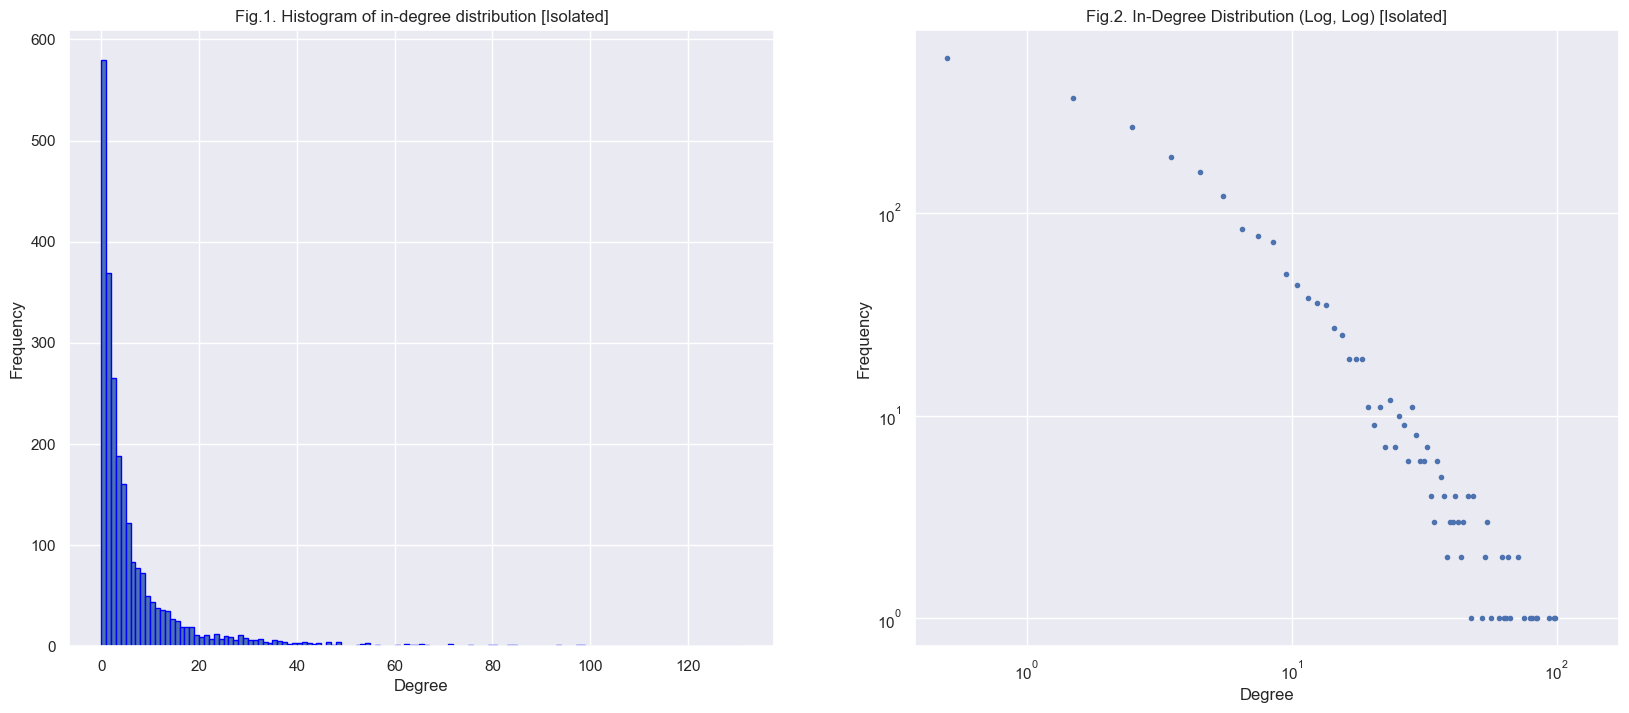

In [163]:
#Plot degree distribution 
plot_degree_distribution(in_deg, "Fig.1. Histogram of in-degree distribution [Isolated]", 
                        "Fig.2. In-Degree Distribution (Log, Log) [Isolated]")

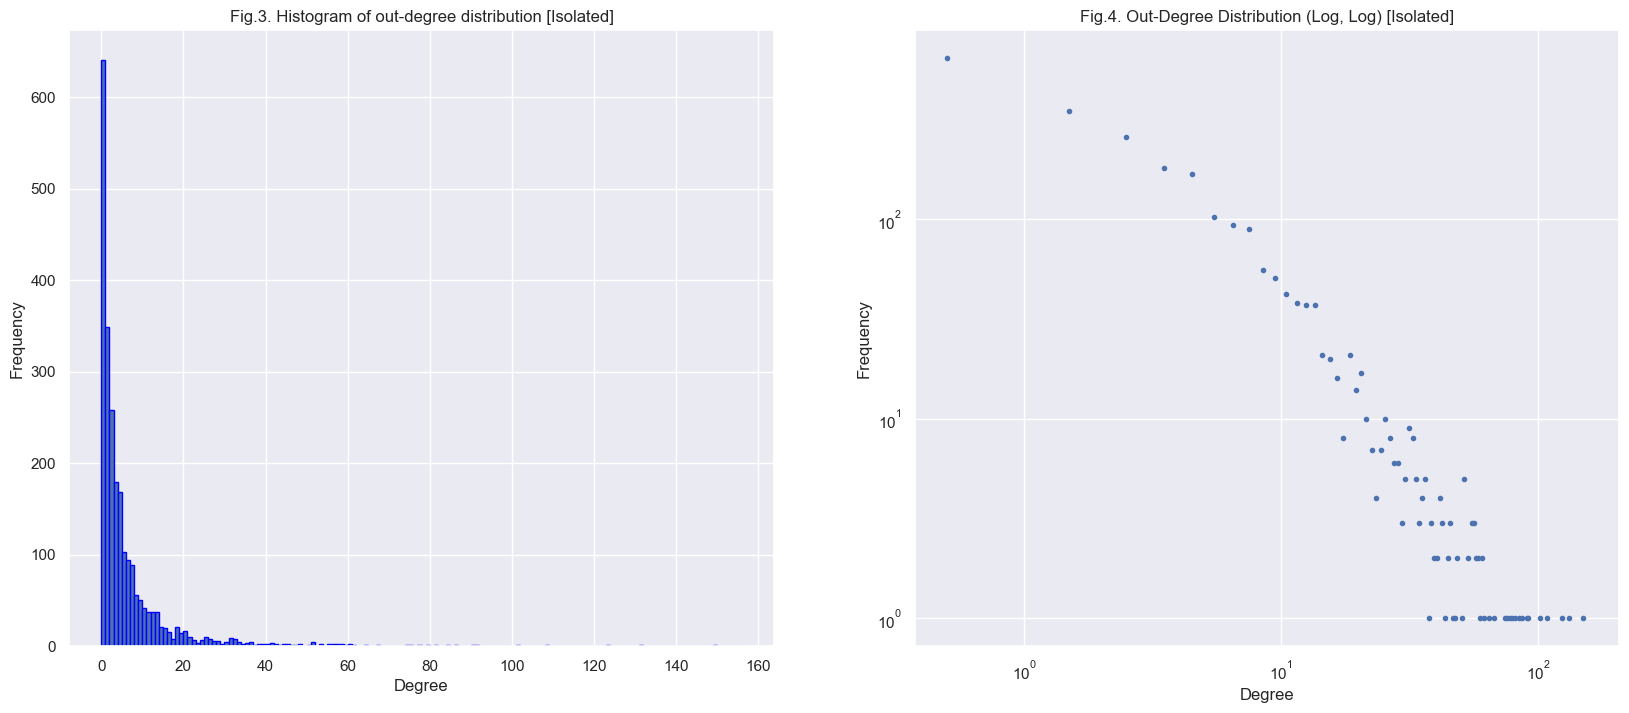

In [164]:
#Plot degree distribution 
plot_degree_distribution(out_deg, "Fig.3. Histogram of out-degree distribution [Isolated]", 
                        "Fig.4. Out-Degree Distribution (Log, Log) [Isolated]")

In [23]:
print(f'Top 3 nodes with the highest degree centrality:\n {sorted(nx.degree_centrality(G).items(), key=lambda t: t[1], reverse=True)[:3]}')

Top 3 nodes with the highest degree centrality:
 [('Led Zeppelin', 0.08326497128794094), ('Mariah Carey', 0.081214109926169), ('Celine Dion', 0.07629204265791632)]


In [24]:

#5. Look into specific album sides. What are the links that we are using? Are some of them unnecessary, such as "See also" which are worthless because they include bias of editors knowledge, while in out sense there is no connection?

## Visualization

In [166]:
def plot_with_fa(G):
    node_size = [node_degree_to_size(d) for k, d in dict(G.degree).items()]
    node_label = {k: k for k, d in dict(G.degree).items() if d > 50}

    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        #edgeWeightInfluence: How much influence you give to the edges weight. 0 is "no influence" and 1 is "normal"
        edgeWeightInfluence=1,

        # Performance
        jitterTolerance=7,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.6,

        # Tuning
        scalingRatio=1.0,
        strongGravityMode=False,
        gravity=15.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)
    nx.draw_networkx_nodes(G, positions, alpha=1, node_color=None, node_size=node_size)
    nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.15)
    nx.draw_networkx_labels(G, positions, node_label, font_size=3, font_color='black')

    
    fig = plt.gcf()
    plt.axis('off')
    plt.show()


100%|██████████| 1000/1000 [00:41<00:00, 23.92it/s]


BarnesHut Approximation  took  18.89  seconds
Repulsion forces  took  19.68  seconds
Gravitational forces  took  0.23  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  1.07  seconds


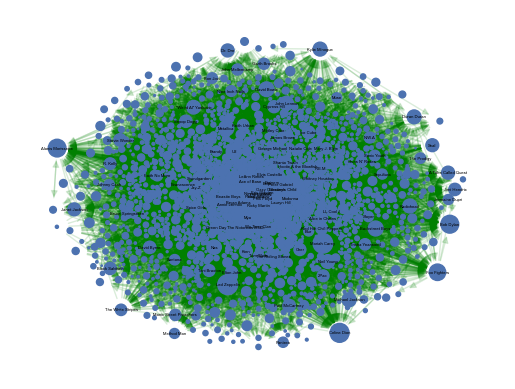

In [167]:
plot_with_fa(GG)

## Draw Network and Save it as GIF - Artur wrote code for it, check build_network.py

In [168]:
# # it's important that the frames go as input and is not generated on the fly
# node_size = [node_degree_to_size(d) for k, d in dict(G.degree).items()]
# node_label = {k: k for k, d in dict(G.degree).items() if d > 40}
# plt.ion()
# forceatlas2 = ForceAtlas2(
#     # Behavior alternatives
#     outboundAttractionDistribution=True,  # Dissuade hubs
#     #edgeWeightInfluence: How much influence you give to the edges weight. 0 is "no influence" and 1 is "normal"
#     edgeWeightInfluence=0,

#     # Performance
#     jitterTolerance=7,  # Tolerance
#     barnesHutOptimize=True,
#     barnesHutTheta=1.6,

#     # Tuning
#     scalingRatio=1.0,
#     strongGravityMode=False,
#     gravity=15.0,

#     # Log
#     verbose=True)

# positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
# nodes = nx.draw_networkx_nodes(G, positions, alpha=1, node_color=None, node_size=node_size)
# edges = nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.15)
# labels = nx.draw_networkx_labels(G, positions, node_label, font_size=1, font_color='black')

# plt.axis('off')
# plt.show()


# ###CREATE GIF
# def update(i):
#     # for i in range(len(frame)):
#     # instead of giving frame as input, if I randomly generate it, then it works
#     nc = frame[i] # np.random.randint(2, size=200)
#     nodes.set_array(nc)
#     return nodes,



# # number of nodes
# size = 10
# #size = G.number_of_nodes()
# # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph
# frame = np.random.random_integers(0, 5, (size, size)) 
# # output animation GIF
